#### modules import

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib
import requests
from io import BytesIO

#### util functions

In [12]:
def url_to_image(url, gray = False):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype = 'uint8')
    
    if gray == True:
        image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)
    else:
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
    return image

def conv_op(image, kernel, padding = 0, stride = 1):
    H, W, C = image.shape
    kernel_size = kernel.shape[0]
    
    out_h = (H + 2 * padding - kernel_size) // stride + 1
    out_w = (W + 2 * padding - kernel_size) // stride + 1
    
    filtered_img = np.zeros((out_h, out_w))
    img = np.pad(image, [(padding, padding), (padding, padding), (0, 0)], 'constant')
    
    for i in range(out_h):
        for j in range(out_w):
            for c in range(C):
                multiply_values = image[i:(i + kernel_size), j:(j + kernel_size), c] * kernel
                sum_value = np.sum(multiply_values)
                
                filtered_img[i,j] += sum_value
            
    
    filtered_img = filtered_img.reshape(1, out_h, out_w, -1).transpose(0, 3, 1, 2)
    return filtered_img.astype(np.uint8)

#### 이미지 확인

image.shape :  (440, 440, 3)


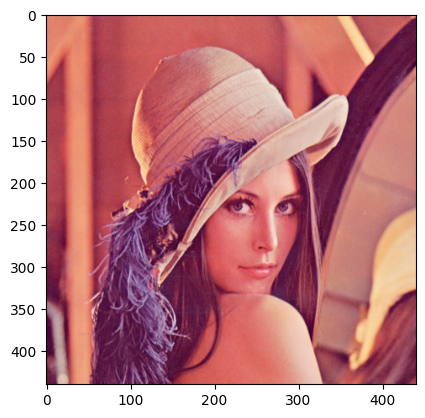

In [3]:
img_url = "https://upload.wikimedia.org/wikipedia/ko/thumb/2/24/Lenna.png/440px-Lenna.png"
image = url_to_image(img_url)

print("image.shape : ", image.shape)

plt.imshow(image)
plt.show()

### 필터연산 적용
- 3x3 크기의 3채널 필터 5개

- (5, 3, 3, 3) ----> (5개, 3채널, 세로, 가로)

In [4]:
# 랜덤 필터
filter1 = np.random.randn(3,3,3)
filter2 = np.random.randn(3,3,3)
filter3 = np.random.randn(3,3,3)
filter4 = np.random.randn(3,3,3)
filter5 = np.random.randn(3,3,3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 1, 438, 438)


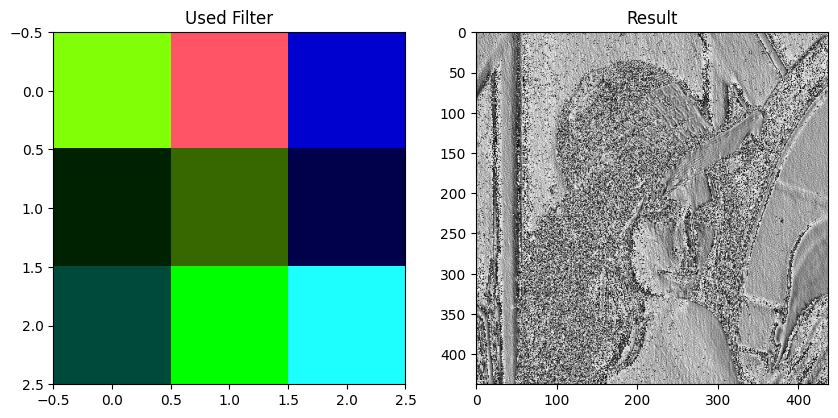

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 1, 438, 438)


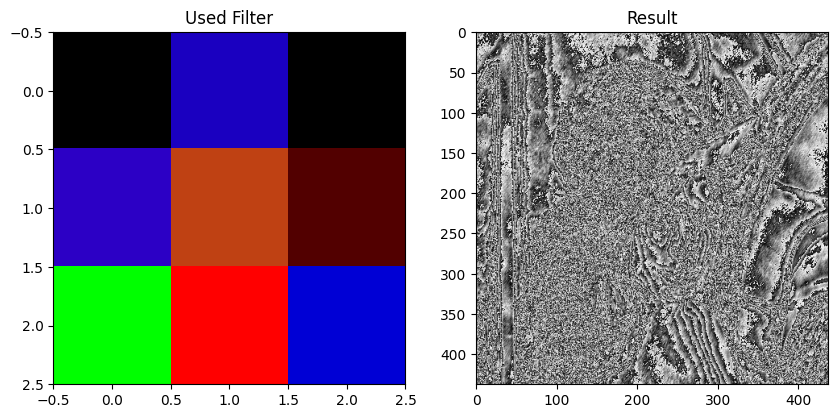

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 1, 438, 438)


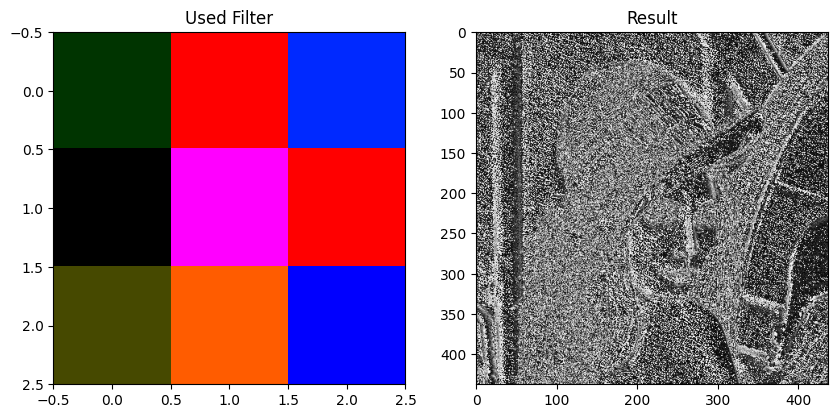

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 1, 438, 438)


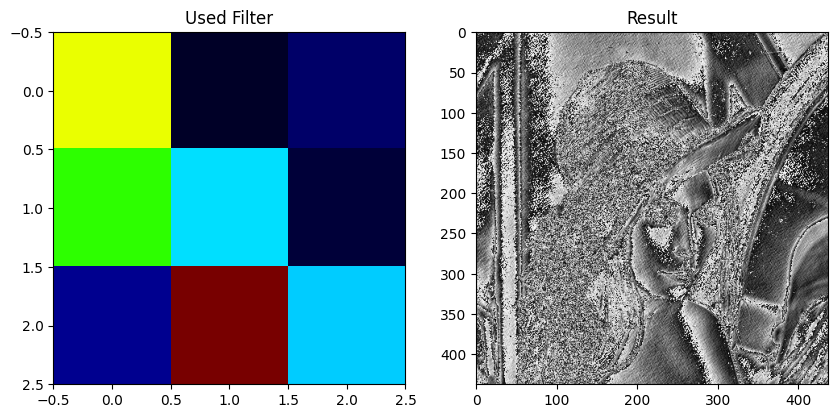

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 1, 438, 438)


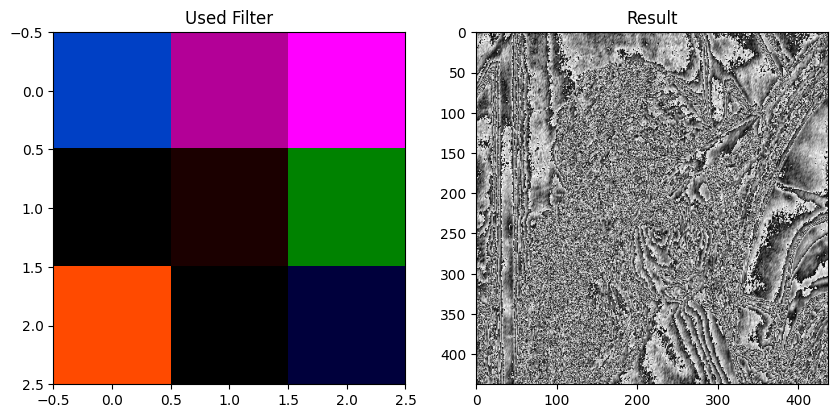

In [13]:
# filter1
filtered_img1 = conv_op(image, filter1)
print(filtered_img1.shape)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('Used Filter')
plt.imshow(filter1, cmap='gray')


plt.subplot(1, 2, 2)
plt.title('Result')
plt.imshow(filtered_img1[0, 0, :, :], cmap='gray')
plt.show()

# filter 2
filtered_img2 = conv_op(image, filter2)
print(filtered_img2.shape)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('Used Filter')
plt.imshow(filter2, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Result')
plt.imshow(filtered_img2[0, 0, :, :], cmap='gray')
plt.show()

# filter 3
filtered_img3 = conv_op(image, filter3)
print(filtered_img3.shape)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('Used Filter')
plt.imshow(filter3, cmap='gray')


plt.subplot(1, 2, 2)
plt.title('Result')
plt.imshow(filtered_img3[0, 0, :, :], cmap='gray')
plt.show()

# filter 4
filtered_img4 = conv_op(image, filter4)
print(filtered_img4.shape)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('Used Filter')
plt.imshow(filter4, cmap='gray')


plt.subplot(1, 2, 2)
plt.title('Result')
plt.imshow(filtered_img4[0, 0, :, :], cmap='gray')
plt.show()

# filter 5
filtered_img5 = conv_op(image, filter5)
print(filtered_img5.shape)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('Used Filter')
plt.imshow(filter5, cmap='gray')


plt.subplot(1, 2, 2)
plt.title('Result')
plt.imshow(filtered_img5[0, 0, :, :], cmap='gray')
plt.show()

#### 필터연산을 적용한 최종 결과

(1, 1, 438, 438)


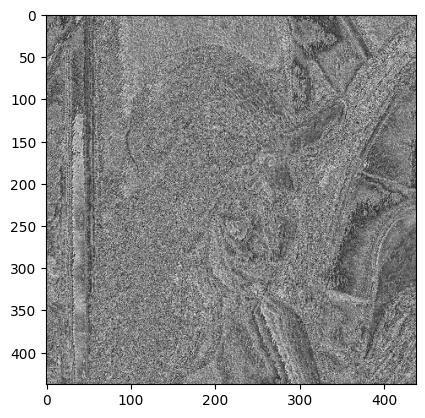

In [6]:
filtered_img = np.stack([filtered_img1, filtered_img2, filtered_img3, filtered_img4, filtered_img5]).sum(axis = 0)
print(filtered_img.shape)

plt.imshow(filtered_img[0 ,0 ,: ,:], cmap='gray')
plt.show()

#### 전체 과정 한번에 보기

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


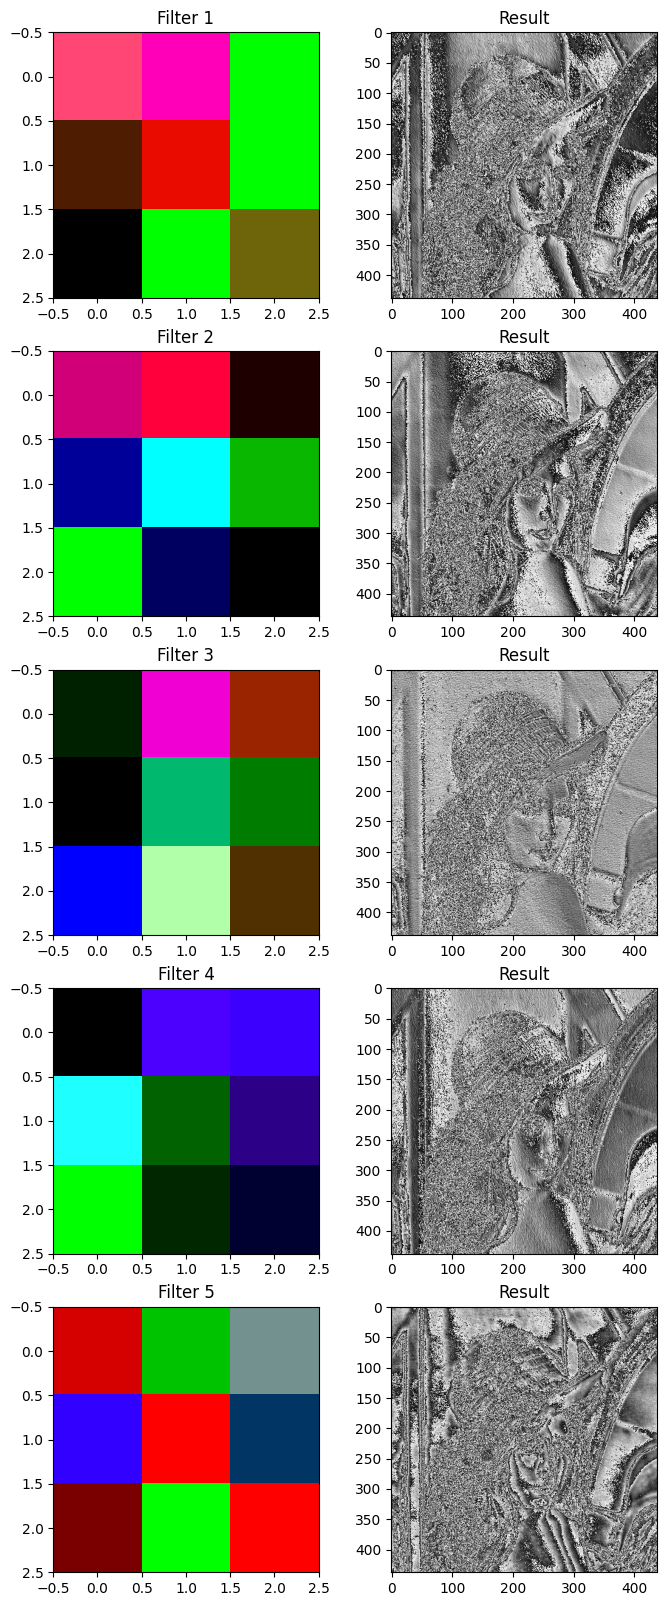

In [7]:
np.random.seed(222)

fig = plt.figure(figsize=(8,20))

filtered_num = 5
filtered_img = []

for i in range(filtered_num):
    ax = fig.add_subplot(5, 2, 2*i+1)
    ax.title.set_text("Filter {}".format(1+i))
    
    filter = np.random.randn(3, 3, 3)
    plt.imshow(filter)
    
    ax = fig.add_subplot(5, 2, 2*i+2)
    ax.title.set_text('Result')
    
    filtered = conv_op(image, filter)
    filtered_img.append(filtered)
    plt.imshow(filtered[0, 0, :, :], cmap='gray')
    
plt.show()

(1, 1, 438, 438)


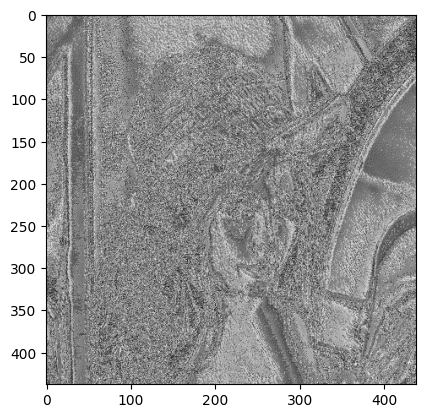

In [8]:
filtered_img = np.stack(filtered_img).sum(axis = 0)
print(filtered_img.shape)

plt.imshow(filtered_img[0 ,0 ,: ,:], cmap='gray')
plt.show()